# 📖 Resources:
- https://www.analyticsvidhya.com/blog/2021/05/how-to-use-progress-bars-in-python/
- https://machinelearningmastery.com/clustering-algorithms-with-python/

# ⬇ Clone repo for Chameleon

In [ ]:
import requests
import tarfile

# Download and extract the file
url = "http://glaros.dtc.umn.edu/gkhome/fetch/sw/metis/metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

# The remaining steps
!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip3 install metis-python

/content/metis-5.1.0
rm -rf build/Linux-x86_64
mkdir -p build/Linux-x86_64
cd build/Linux-x86_64 && cmake /content/metis-5.1.0 -DCMAKE_VERBOSE_MAKEFILE=1 -DGKLIB_PATH=/content/metis-5.1.0/GKlib -DCMAKE_INSTALL_PREFIX=/root/.local/ -DSHARED=1
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX comp

In [ ]:
pwd

'/content/metis-5.1.0'

In [ ]:
import sys
sys.path.append("/content/chameleon_algorithm")

In [ ]:
!git clone https://github.com/mohammadjafarpoor/chameleon_algorithm.git

Cloning into 'chameleon_algorithm'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 46 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (46/46), 96.53 KiB | 830.00 KiB/s, done.
Resolving deltas: 100% (11/11), done.


# 🔽 Importing and Installing Libraries and Modules

In [ ]:
!pip install networkx

In [ ]:
!pip install metis

In [ ]:
!pip install graphtools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

In [ ]:
!pip install torch_geometric

In [ ]:
!pip install simple-kNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from collections import Counter
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import time
import os
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.inspection import permutation_importance
# import graphtools as gt # for DBCV metric

# 🗻 Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/chameleon_algorithm')

In [ ]:
path = "/content/drive/MyDrive/DataMining-Prj4/"

# 📝 Exploration input data

In [ ]:
df = pd.read_csv(path + 'Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298174 entries, 0 to 298173
Data columns (total 83 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        298174 non-null  int64  
 1   FEATURE1     298174 non-null  int64  
 2   FEATURE2     298174 non-null  int64  
 3   FEATURE3     298174 non-null  int64  
 4   FEATURE4     298174 non-null  int64  
 5   FEATURE5     298174 non-null  int64  
 6   FEATURE6     298174 non-null  int64  
 7   FEATURE7     298174 non-null  int64  
 8   FEATURE8     298174 non-null  int64  
 9   FEATURE9     298174 non-null  int64  
 10  FEATURE10    298174 non-null  int64  
 11  FEATURE11    298174 non-null  int64  
 12  FEATURE12    298174 non-null  int64  
 13  FEATURE13    298174 non-null  int64  
 14  FEATURE14    298174 non-null  int64  
 15  FEATURE15    298174 non-null  int64  
 16  FEATURE16    298174 non-null  int64  
 17  FEATURE17    298174 non-null  int64  
 18  FEATURE18    298174 non-

In [ ]:
df.describe()

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
count,298174.00000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000,...,298174.000000,298174.000000,298174.000000,298174.000000,2.981740e+05,298174.000000,298174.000000,298174.000000,298174.000000,298174.000000
mean,149087.50000,132.433569,0.707882,1.916324,1.848867,2.074329,1.196798,12.018157,0.506100,9.212876,...,35.559026,32.703549,2.406712,0.307082,1.609005e+06,0.848109,5.852325,2.031883,5.269175,0.003320
std,86075.56392,309.759500,9.664803,2.453245,1.806889,2.764777,0.892906,13.194637,1.534185,10.296934,...,125.777263,81.198569,4.796139,1.036887,4.731976e+07,0.965578,8.138795,1.900823,7.460709,0.057526
min,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74544.25000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,4.000000,...,3.000000,5.000000,0.000000,0.000000,2.000000e+00,0.000000,1.750000,1.000000,1.000000,0.000000
50%,149087.50000,53.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000,0.000000,6.000000,...,10.000000,12.000000,1.000000,0.000000,6.000000e+00,1.000000,3.333333,1.333333,3.000000,0.000000
75%,223630.75000,133.000000,0.000000,2.000000,2.000000,2.000000,1.000000,15.000000,0.000000,11.000000,...,29.000000,31.000000,3.000000,0.000000,2.000000e+01,1.000000,7.000000,2.333333,7.000000,0.000000
max,298174.00000,31652.000000,1001.000000,313.000000,61.000000,313.000000,59.000000,494.000000,55.000000,488.000000,...,7844.000000,5503.000000,140.000000,82.000000,5.000111e+09,37.000000,483.750000,60.000000,245.000000,1.000000


In [ ]:
df.head()

,Index,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1,718,0,2,2,2,1,17,0,12,...,62,118,9,0,77,1,7.121212,1.909091,25,0
1,2,218,0,2,2,2,1,15,0,7,...,41,41,1,1,23,0,4.545455,1.090909,2,0
2,3,4,0,1,1,1,1,3,0,3,...,0,2,0,0,1,0,2.000000,1.000000,2,0
3,4,5,0,2,2,2,1,4,0,4,...,245,279,0,0,0,0,0.000000,0.000000,0,0
4,5,19,0,1,1,1,1,9,0,4,...,2,2,0,0,1,1,1.000000,1.000000,1,0


## Pre-processing (Z-Score)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
X = df.iloc[:, 1:-1] # all columns except the first and the last
y = df.iloc[:, -1] # the last column

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled = pd.concat([X_scaled_df, y], axis=1)

In [ ]:
df_scaled.head()

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0


In [ ]:
df_scaled.describe()

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
count,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,...,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,2.981740e+05,298174.000000
mean,4.251237e-17,6.195748e-18,6.612770e-18,-4.466896e-17,1.340426e-17,2.751151e-17,-5.445110e-17,3.479151e-18,-1.012767e-18,-2.144682e-18,...,2.135150e-17,-3.421960e-17,-4.720684e-17,-2.511661e-17,-1.310639e-18,-5.051918e-18,1.427167e-16,-1.286809e-18,-2.282895e-17,0.003320
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.057526
min,-4.243091e-01,-7.324341e-02,-3.735157e-01,-4.697955e-01,-3.885778e-01,-2.204018e-01,-9.108381e-01,-3.298829e-01,-8.947218e-01,-5.330841e-01,...,-2.827147e-01,-4.027608e-01,-5.018028e-01,-2.961585e-01,-3.400287e-02,-8.783447e-01,-7.190664e-01,-1.068951e+00,-7.062578e-01,0.000000
25%,-3.629711e-01,-7.324341e-02,-3.735157e-01,-4.697955e-01,-3.885778e-01,-2.204018e-01,-6.076841e-01,-3.298829e-01,-5.062560e-01,-5.330841e-01,...,-2.588630e-01,-3.411833e-01,-5.018028e-01,-2.961585e-01,-3.400283e-02,-8.783447e-01,-5.040465e-01,-5.428623e-01,-5.722220e-01,0.000000
50%,-2.564367e-01,-7.324341e-02,-3.735157e-01,-4.697955e-01,-3.885778e-01,-2.204018e-01,-3.045301e-01,-3.298829e-01,-3.120231e-01,-5.330841e-01,...,-2.032090e-01,-2.549747e-01,-2.933015e-01,-2.961585e-01,-3.400274e-02,1.573062e-01,-3.095047e-01,-3.674994e-01,-3.041505e-01,0.000000
75%,1.828619e-03,-7.324341e-02,3.410833e-02,8.364293e-02,-2.688434e-02,-2.204018e-01,2.259894e-01,-3.298829e-01,1.735592e-01,2.406701e-01,...,-5.214803e-02,-2.098007e-02,1.237013e-01,-2.961585e-01,-3.400245e-02,1.573062e-01,1.410132e-01,1.585895e-01,2.319924e-01,0.000000
max,1.017551e+02,1.034986e+02,1.268052e+02,3.273651e+01,1.124598e+02,6.473613e+01,3.652868e+01,3.551984e+01,4.649811e+01,8.071111e+01,...,6.208160e+01,6.736948e+01,2.868839e+01,7.878682e+01,1.056326e+02,3.744074e+01,5.871858e+01,3.049638e+01,3.213250e+01,1.000000


# 🔃 Correlation and Heat Map

In [ ]:
# Exclude the last column
df_corr = df_scaled.iloc [:, :-1].corr()


In [ ]:
df_corr

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
FEATURE1,1.000000,0.184911,0.228226,0.240016,0.234223,0.144413,0.326412,0.171014,0.276971,0.294280,...,0.603957,0.639951,0.700037,0.616254,0.226677,0.313537,0.189082,0.267178,0.195622,0.542660
FEATURE2,0.184911,1.000000,0.032185,0.030240,0.033091,0.016819,0.024418,0.004680,0.020817,0.027909,...,0.073898,0.124362,0.085826,0.040259,0.106706,0.065722,0.018268,0.024489,0.002449,0.036067
FEATURE3,0.228226,0.032185,1.000000,0.785091,0.968051,0.520634,0.730817,0.422648,0.786833,0.450942,...,0.335373,0.108858,0.154793,0.265263,0.051218,0.133596,-0.056882,0.790362,0.518498,0.218920
FEATURE4,0.240016,0.030240,0.785091,1.000000,0.797964,0.605563,0.775083,0.517651,0.808896,0.300550,...,0.388539,0.115810,0.182834,0.340836,0.056461,0.163568,-0.081058,0.766844,0.671692,0.271766
FEATURE5,0.234223,0.033091,0.968051,0.797964,1.000000,0.542560,0.730585,0.422796,0.784571,0.442770,...,0.356571,0.114470,0.161124,0.267047,0.053678,0.138527,-0.053820,0.787849,0.519861,0.222593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FEATURE77,0.313537,0.065722,0.133596,0.163568,0.138527,0.113556,0.141591,0.093181,0.147759,0.058942,...,0.113277,0.143932,0.156685,0.145357,0.040044,1.000000,0.028072,0.145363,0.082657,0.114039
FEATURE78,0.189082,0.018268,-0.056882,-0.081058,-0.053820,-0.043439,-0.016301,-0.047769,-0.060099,0.092353,...,0.356614,0.135463,0.102701,0.104555,0.083867,0.028072,1.000000,-0.060266,-0.077847,0.112396
FEATURE79,0.267178,0.024489,0.790362,0.766844,0.787849,0.473899,0.926687,0.658619,0.969759,0.426701,...,0.359360,0.095302,0.158083,0.376203,0.064898,0.145363,-0.060266,1.000000,0.770121,0.306306
FEATURE80,0.195622,0.002449,0.518498,0.671692,0.519861,0.306370,0.766553,0.614141,0.781747,0.293827,...,0.300573,0.052510,0.122953,0.467675,0.048669,0.082657,-0.077847,0.770121,1.000000,0.296384


<Axes: >

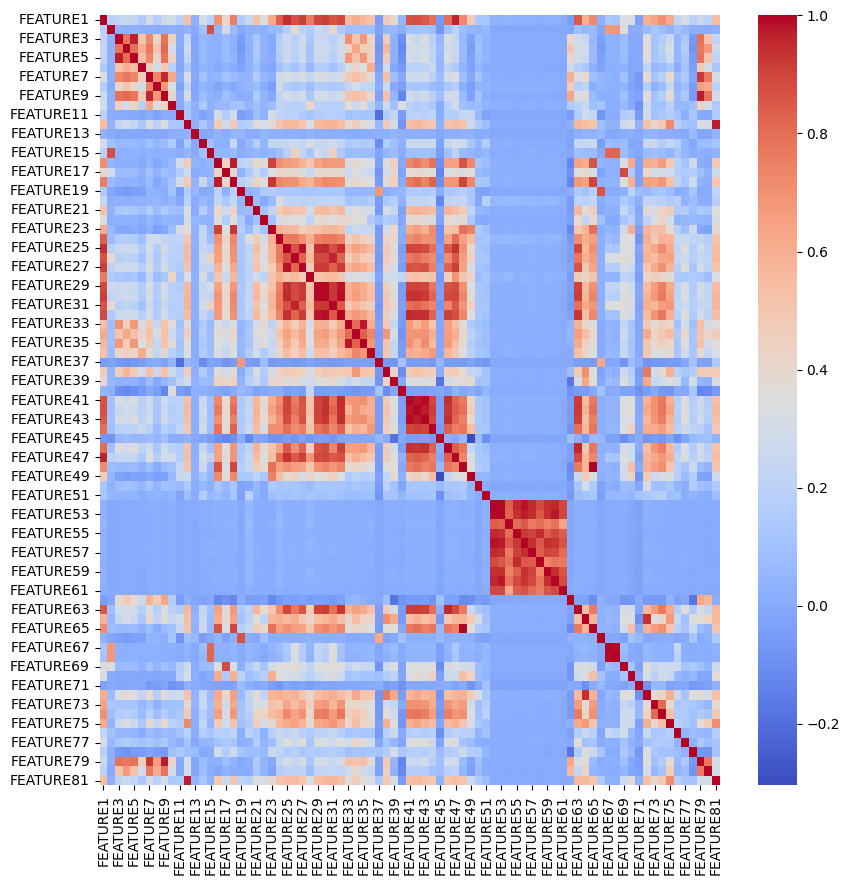

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=False, cmap="coolwarm")

# ✏ Part 4

## Separating Dataset

In [ ]:
# Split the dataset by class label
df_0 = df_scaled[df_scaled['Class Label'] == 0]
df_1 = df_scaled[df_scaled['Class Label'] == 1]

In [ ]:
df_0

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186,0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151,0
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222,0
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079,0


In [ ]:
df_1

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
82,5.096112,-0.073243,4.517972,6.171465,3.951744,-0.220402,7.122743,0.321930,8.039992,2.561933,...,1.021180,1.826346,2.000214,0.668268,17.383900,-0.878345,5.784774,2.789034,-0.170115,1
533,19.675189,0.030225,3.702724,5.064589,3.590050,3.139419,5.455396,2.277370,6.000546,1.788179,...,3.175786,7.602320,8.046754,1.632695,30.858017,0.157306,5.602307,4.055880,5.727458,1
1099,3.191405,-0.073243,0.849356,1.190520,0.696503,0.899538,1.362817,0.973743,1.533190,-0.017248,...,1.164290,4.018507,11.799779,1.632695,-0.033996,0.157306,1.920745,1.960045,8.274137,1
1364,9.641581,-0.073243,4.110348,4.511150,4.675131,9.859059,2.575433,0.973743,2.892820,0.756506,...,3.732326,3.833774,2.208715,-0.296158,-0.033837,2.228608,3.189098,1.682898,1.438314,1
1392,18.887480,1.892656,5.333220,4.511150,5.036824,0.899538,5.985915,0.321930,6.680362,2.561933,...,12.605169,12.343791,6.795746,-0.296158,0.015226,1.192957,3.933911,3.986076,5.459386,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296911,13.544616,1.375314,0.849356,0.637081,1.058196,0.899538,0.680720,0.321930,0.853374,-0.275166,...,10.410810,12.651678,14.510297,-0.296158,0.625186,0.157306,1.064135,0.374350,14.037673,1
297208,11.065269,28.070161,1.256980,0.637081,1.058196,-0.220402,1.287028,-0.329883,0.756258,2.304015,...,4.972616,-0.082558,-0.501803,-0.296158,-0.034000,-0.878345,0.902798,-0.174600,-0.304151,1
297289,21.186041,3.237745,0.849356,0.637081,0.696503,-0.220402,0.529143,-0.329883,0.756258,-0.017248,...,56.150473,54.339675,3.251222,0.668268,-0.033840,0.157306,0.890891,-0.284338,4.655172,1
297504,7.052472,0.444099,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.409140,0.240670,...,-0.131654,-0.193397,-0.293301,1.632695,-0.034003,0.157306,-0.385566,-0.317396,0.097957,1


In [ ]:
# summarize the class distribution
target = df_scaled.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0.0, Count=297184, Percentage=99.668%
Class=1.0, Count=990, Percentage=0.332%


Since our dataset is too large, I have used the Batch K-Means algorithm when dealing with records with 0 class label.

https://thecleverprogrammer.com/2021/09/10/mini-batch-k-means-clustering-in-machine-learning/

In [ ]:
# Get the number of cores
cores = os.cpu_count()

print(cores)

2


In [ ]:
def find_optimal_k(df):
  scores = []
  for k in tqdm_notebook(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print(f"The K: {k}, and the Score is: {score}")
    scores.append(score)
    max_index = scores.index(max(scores))
  return max_index + 2

In [ ]:
def find_optimal_k_batch(df):
  scores = []
  for k in tqdm_notebook(range(2, 11)):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size= 256 * cores)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print(f"The K: {k}, and the Score is: {score}")
    scores.append(score)
    max_index = scores.index(max(scores))
  return max_index + 2

In [ ]:
# Find the optimal K for each subset
k_0 = find_optimal_k_batch(df_0)
k_1 = find_optimal_k(df_1)
print(f"The Optimal K Values using Silhouette Metric for Samples with 0 and 1 Labels are : {k_0} and {k_1}")

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 2, and the Score is: 0.5512454458794002


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 3, and the Score is: 0.06417865350309687


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 4, and the Score is: 0.13547789390285908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 5, and the Score is: 0.2760547712393273


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 6, and the Score is: 0.05382817243172714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 7, and the Score is: 0.06890696034044294


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 8, and the Score is: 0.09076011836562833


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 9, and the Score is: 0.0352437083665073


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 10, and the Score is: 0.08444447592786447


  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 2, and the Score is: 0.41178568170513513


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 3, and the Score is: 0.4263116503112552


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 4, and the Score is: 0.375840342489935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 5, and the Score is: 0.39065847959514477


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 6, and the Score is: 0.40728786489244684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 7, and the Score is: 0.34055042684451


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 8, and the Score is: 0.368791102785278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 9, and the Score is: 0.3301187540899497


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 10, and the Score is: 0.3401480959584267
The Optimal K Values using Silhouette Metric for Samples with 0 and 1 Labels are : 2 and 3


## Part 4-1

In [ ]:
X = df_scaled.iloc [:, :-1]

In [ ]:
X

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,1.992453,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.923139,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-1.261303,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,-1.870637,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-1.261303,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,0.237314,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.904865,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,0.449316,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.566701,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079


In [ ]:
k_all =  find_optimal_k_batch(X)
print(f"The Optimal K Value using Silhouette Metric for All the Samples is: {k}")

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 2, and the Score is: 0.39347807646334904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 3, and the Score is: 0.4548764034775035


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 4, and the Score is: 0.05347469436836552


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 5, and the Score is: 0.2653440247130557


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 6, and the Score is: 0.016113224947172686


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 7, and the Score is: 0.06639714439432572


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 8, and the Score is: 0.0470531377101693


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 9, and the Score is: 0.03910171090671424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The K: 10, and the Score is: 0.08750576624798158
The Optimal K Value using Silhouette Metric for All the Samples is: 1.0


In [ ]:
X_scaled_df

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,1.992453,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.923139,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-1.261303,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,-1.870637,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-1.261303,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,0.237314,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.904865,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,0.449316,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.566701,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079


In [ ]:
k_opt = 3
# fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans.fit(X_scaled_df)
centroids = kmeans.cluster_centers_
print(f"The centroids are: {centroids}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The centroids are: [[-2.24873891e-01 -3.95096060e-02 -1.47575674e-01 -1.76039328e-01
  -1.52609678e-01 -9.52661461e-02 -1.83914891e-01 -1.12945757e-01
  -1.75995861e-01 -1.05793878e-01 -8.65959114e-02 -2.07917721e-01
  -1.29075574e-02 -8.81695605e-02 -3.85557956e-02 -2.00871614e-01
  -1.47384915e-01 -2.15059505e-01 -3.61429934e-02 -7.65206511e-02
  -1.42843215e-01 -7.24114126e-02 -1.84331315e-01 -2.24121818e-01
  -2.13502888e-01 -2.25686742e-01 -1.89934538e-01 -1.57842037e-01
  -2.07298404e-01 -2.16806137e-01 -2.28623221e-01 -2.03047388e-01
  -1.76068050e-01 -2.32263860e-01 -1.84985095e-01 -1.87065308e-01
   2.37527572e-02 -2.53612269e-01 -1.77926685e-01  2.19065774e-02
  -2.04037269e-01 -2.19485420e-01 -2.00720133e-01 -2.07760369e-01
   1.68892198e-02 -1.88880754e-01 -2.18388961e-01 -1.95660228e-01
  -1.55346765e-01 -6.08547524e-02 -5.37081523e-02 -1.43188779e-02
  -1.41804431e-02 -1.34792315e-02 -1.33391411e-02 -1.43095317e-02
  -1.38413762e-02 -1.29380420e-02 -1.40212713e-02 -1.3606

In [ ]:
# calculate the feature importance for each cluster
importance = []
for i in range(81):
  imp = 1 - np.std(centroids[:, i]) / (np.max(centroids[:, i]) - np.min(centroids[:, i]))
  importance.append(imp)

# sort the features by importance in descending order
features = X_scaled_df.columns
sorted_features = sorted(zip(features, importance), key=lambda x: x[1], reverse=True)

# print the feature importance
print("Feature importance for k-means clustering for all the samples:")
for f, i in sorted_features:
  print(f"{f}: {i:.4f}")

Feature importance for k-means clustering for all the samples:
FEATURE64: 0.5918
FEATURE45: 0.5917
FEATURE38: 0.5917
FEATURE72: 0.5917
FEATURE11: 0.5917
FEATURE7: 0.5917
FEATURE76: 0.5915
FEATURE9: 0.5914
FEATURE4: 0.5909
FEATURE79: 0.5904
FEATURE50: 0.5903
FEATURE8: 0.5901
FEATURE71: 0.5898
FEATURE62: 0.5895
FEATURE78: 0.5873
FEATURE10: 0.5860
FEATURE6: 0.5858
FEATURE39: 0.5855
FEATURE5: 0.5847
FEATURE37: 0.5843
FEATURE3: 0.5837
FEATURE51: 0.5819
FEATURE61: 0.5819
FEATURE69: 0.5768
FEATURE80: 0.5763
FEATURE17: 0.5751
FEATURE75: 0.5739
FEATURE81: 0.5730
FEATURE12: 0.5725
FEATURE49: 0.5711
FEATURE34: 0.5690
FEATURE59: 0.5650
FEATURE66: 0.5629
FEATURE36: 0.5619
FEATURE23: 0.5611
FEATURE14: 0.5607
FEATURE60: 0.5604
FEATURE33: 0.5594
FEATURE18: 0.5592
FEATURE16: 0.5591
FEATURE24: 0.5587
FEATURE35: 0.5586
FEATURE20: 0.5585
FEATURE56: 0.5582
FEATURE55: 0.5579
FEATURE70: 0.5576
FEATURE58: 0.5573
FEATURE52: 0.5562
FEATURE53: 0.5557
FEATURE48: 0.5556
FEATURE40: 0.5555
FEATURE65: 0.5554
FEATURE2

## Part 4-2

### For class label = 0

In [ ]:
X_0 = df_0.iloc[:, :-1]

In [ ]:
X_0

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,1.992453,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.923139,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-1.261303,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,-1.870637,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-1.261303,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,0.237314,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.904865,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,0.449316,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.566701,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079


In [ ]:
k_opt_0 = 2
# fit the k-means model with the optimal number of clusters
kmeans_0 = KMeans(n_clusters=k_opt, random_state=42)
kmeans_0.fit(X_0)
centroids_0 = kmeans_0.cluster_centers_
print(f"The centroids are: {centroids_0}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The centroids are: [[-2.19025235e-01 -3.84990330e-02 -1.39327921e-01 -1.65478220e-01
  -1.43885824e-01 -8.97971731e-02 -1.73197174e-01 -1.06917894e-01
  -1.65422109e-01 -1.00554624e-01 -8.46330569e-02 -2.00117771e-01
  -1.28197039e-02 -8.56137161e-02 -3.76400610e-02 -1.95515609e-01
  -1.41549445e-01 -2.09279471e-01 -3.61791206e-02 -7.43188124e-02
  -1.39007143e-01 -7.05473843e-02 -1.79370240e-01 -2.17769619e-01
  -2.08141921e-01 -2.19482902e-01 -1.85448257e-01 -1.53596869e-01
  -2.02132579e-01 -2.11389011e-01 -2.22308579e-01 -1.98214680e-01
  -1.69441567e-01 -2.22765483e-01 -1.78313347e-01 -1.80480583e-01
   2.26030527e-02 -2.38666296e-01 -1.67009177e-01  2.02571468e-02
  -1.99190500e-01 -2.14040766e-01 -1.96011653e-01 -2.02720846e-01
   1.61336967e-02 -1.84612079e-01 -2.12837319e-01 -1.90689159e-01
  -1.50629558e-01 -5.65228118e-02 -5.10148148e-02 -2.26143624e-02
  -2.27465527e-02 -1.94705616e-02 -2.06543619e-02 -2.27045197e-02
  -2.09728567e-02 -1.83598707e-02 -2.27657534e-02 -2.2150

### For class label = 1

In [ ]:
X_1 = df_1.iloc[:, :-1]

In [ ]:
X_1

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
82,5.096112,-0.073243,4.517972,6.171465,3.951744,-0.220402,7.122743,0.321930,8.039992,2.561933,...,2.795776,1.021180,1.826346,2.000214,0.668268,17.383900,-0.878345,5.784774,2.789034,-0.170115
533,19.675189,0.030225,3.702724,5.064589,3.590050,3.139419,5.455396,2.277370,6.000546,1.788179,...,3.935975,3.175786,7.602320,8.046754,1.632695,30.858017,0.157306,5.602307,4.055880,5.727458
1099,3.191405,-0.073243,0.849356,1.190520,0.696503,0.899538,1.362817,0.973743,1.533190,-0.017248,...,2.551541,1.164290,4.018507,11.799779,1.632695,-0.033996,0.157306,1.920745,1.960045,8.274137
1364,9.641581,-0.073243,4.110348,4.511150,4.675131,9.859059,2.575433,0.973743,2.892820,0.756506,...,4.035940,3.732326,3.833774,2.208715,-0.296158,-0.033837,2.228608,3.189098,1.682898,1.438314
1392,18.887480,1.892656,5.333220,4.511150,5.036824,0.899538,5.985915,0.321930,6.680362,2.561933,...,3.273941,12.605169,12.343791,6.795746,-0.296158,0.015226,1.192957,3.933911,3.986076,5.459386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296911,13.544616,1.375314,0.849356,0.637081,1.058196,0.899538,0.680720,0.321930,0.853374,-0.275166,...,4.256395,10.410810,12.651678,14.510297,-0.296158,0.625186,0.157306,1.064135,0.374350,14.037673
297208,11.065269,28.070161,1.256980,0.637081,1.058196,-0.220402,1.287028,-0.329883,0.756258,2.304015,...,1.652145,4.972616,-0.082558,-0.501803,-0.296158,-0.034000,-0.878345,0.902798,-0.174600,-0.304151
297289,21.186041,3.237745,0.849356,0.637081,0.696503,-0.220402,0.529143,-0.329883,0.756258,-0.017248,...,4.569942,56.150473,54.339675,3.251222,0.668268,-0.033840,0.157306,0.890891,-0.284338,4.655172
297504,7.052472,0.444099,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.409140,0.240670,...,0.313805,-0.131654,-0.193397,-0.293301,1.632695,-0.034003,0.157306,-0.385566,-0.317396,0.097957


In [ ]:
k_opt_1 = 3
# fit the k-means model with the optimal number of clusters
kmeans_1 = KMeans(n_clusters=k_opt, random_state=42)
kmeans_1.fit(X_1)
centroids_1 = kmeans_1.cluster_centers_
print(f"The centroids are: {centroids_1}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The centroids are: [[ 7.92434425e+00  1.61641372e+00  1.11246408e+00  1.15307464e+00
   1.10958684e+00  7.52536714e-01  1.62105151e+00  1.20395074e+00
   1.30873092e+00  1.40217401e+00  1.34948000e+00  3.85448420e+00
   3.70647139e-01  1.95219652e+00  1.39805605e+00  4.96906646e+00
   3.65800634e+00  5.30755153e+00  9.83750171e-01  1.88583800e+00
   5.00297356e+00  1.52897189e+00  4.09598186e+00  7.74793936e+00
   6.68557103e+00  6.78078668e+00  6.06135751e+00  7.49563072e+00
   6.56762275e+00  6.66128984e+00  6.84625076e+00  6.34054330e+00
   2.85326606e+00  3.57540592e+00  2.89024032e+00  3.38158104e+00
  -3.65262413e-01  2.52421654e+00  1.69027405e+00  3.82830714e-01
   5.83852926e+00  6.17725673e+00  5.71202692e+00  5.66113924e+00
  -3.47188258e-01  5.51349202e+00  7.81449110e+00  4.70536133e+00
   3.88897935e+00  2.31458981e-01  6.62711550e-01  1.02320790e-02
   7.25992237e-03  3.15907535e-03  1.50109643e-05  1.27281194e-02
   1.47477021e-03  1.13118342e-03 -3.28188473e-03 -2.1995

### Merging the results

In [ ]:
# calculate the feature importance for each cluster for each subset
importance_0 = []
importance_1 = []
features = X.columns
for i in range(len(features)):
  imp_0 = 1 - np.std(centroids_0[:, i]) / (np.max(centroids_0[:, i]) - np.min(centroids_0[:, i]))
  importance_0.append(imp_0)

  imp_1 = 1 - np.std(centroids_1[:, i]) / (np.max(centroids_1[:, i]) - np.min(centroids_1[:, i]))
  importance_1.append(imp_1)

# sort the features by importance in descending order for each subset
sorted_features_0 = sorted(zip(features, importance_0), key=lambda x: x[1], reverse=True)
sorted_features_1 = sorted(zip(features, importance_1), key=lambda x: x[1], reverse=True)

# print the feature importance for each subset
print("Feature importance for k-means clustering for class label = 0:")
for f, i in sorted_features_0:
  print(f"{f}: {i:.4f}")

print("Feature importance for k-means clustering for class label = 1:")
for f, i in sorted_features_1:
  print(f"{f}: {i:.4f}")

Feature importance for k-means clustering for class label = 0:
FEATURE18: 0.5918
FEATURE27: 0.5918
FEATURE36: 0.5918
FEATURE29: 0.5917
FEATURE67: 0.5917
FEATURE30: 0.5917
FEATURE31: 0.5917
FEATURE41: 0.5917
FEATURE26: 0.5917
FEATURE43: 0.5916
FEATURE32: 0.5916
FEATURE16: 0.5916
FEATURE25: 0.5916
FEATURE44: 0.5915
FEATURE39: 0.5914
FEATURE42: 0.5913
FEATURE69: 0.5913
FEATURE40: 0.5913
FEATURE20: 0.5912
FEATURE33: 0.5912
FEATURE35: 0.5907
FEATURE34: 0.5901
FEATURE7: 0.5900
FEATURE46: 0.5900
FEATURE21: 0.5900
FEATURE47: 0.5898
FEATURE68: 0.5897
FEATURE73: 0.5896
FEATURE72: 0.5890
FEATURE63: 0.5890
FEATURE76: 0.5875
FEATURE22: 0.5871
FEATURE38: 0.5870
FEATURE23: 0.5868
FEATURE74: 0.5865
FEATURE64: 0.5856
FEATURE48: 0.5856
FEATURE65: 0.5855
FEATURE1: 0.5850
FEATURE62: 0.5844
FEATURE3: 0.5836
FEATURE4: 0.5825
FEATURE5: 0.5823
FEATURE79: 0.5816
FEATURE6: 0.5811
FEATURE14: 0.5796
FEATURE37: 0.5795
FEATURE19: 0.5780
FEATURE75: 0.5767
FEATURE13: 0.5763
FEATURE9: 0.5752
FEATURE45: 0.5749
FEATURE1

In [ ]:
# define a function to calculate the weighted average of two lists
def weighted_average(x, y, w):
  return [w * a + (1 - w) * b for a, b in zip(x, y)]

# define a weight for each subset based on the size of the subset
w_0 = len(X_0) / len(X)
w_1 = len(X_1) / len(X)

# calculate the weighted average of the feature importance from both subsets
importance_avg = weighted_average(importance_0, importance_1, w_0)

# sort the features by the weighted average importance in descending order
sorted_features_avg = sorted(zip(features, importance_avg), key=lambda x: x[1], reverse=True)

# print the feature importance based on the weighted average
print("Feature importance for k-means clustering based on the weighted average:")
for f, i in sorted_features_avg:
  print(f"{f}: {i:.4f}")

Feature importance for k-means clustering based on the weighted average:
FEATURE18: 0.5916
FEATURE67: 0.5916
FEATURE36: 0.5916
FEATURE27: 0.5916
FEATURE31: 0.5916
FEATURE29: 0.5916
FEATURE26: 0.5915
FEATURE16: 0.5915
FEATURE30: 0.5915
FEATURE41: 0.5915
FEATURE43: 0.5914
FEATURE32: 0.5914
FEATURE25: 0.5914
FEATURE44: 0.5914
FEATURE39: 0.5913
FEATURE40: 0.5912
FEATURE69: 0.5912
FEATURE42: 0.5911
FEATURE33: 0.5911
FEATURE20: 0.5910
FEATURE35: 0.5905
FEATURE7: 0.5900
FEATURE21: 0.5899
FEATURE34: 0.5899
FEATURE46: 0.5898
FEATURE47: 0.5897
FEATURE68: 0.5896
FEATURE73: 0.5894
FEATURE72: 0.5889
FEATURE63: 0.5888
FEATURE76: 0.5875
FEATURE38: 0.5869
FEATURE22: 0.5869
FEATURE23: 0.5868
FEATURE74: 0.5863
FEATURE64: 0.5855
FEATURE48: 0.5854
FEATURE65: 0.5854
FEATURE1: 0.5849
FEATURE62: 0.5844
FEATURE3: 0.5835
FEATURE4: 0.5824
FEATURE5: 0.5821
FEATURE79: 0.5814
FEATURE6: 0.5809
FEATURE14: 0.5797
FEATURE37: 0.5795
FEATURE19: 0.5779
FEATURE75: 0.5768
FEATURE13: 0.5763
FEATURE9: 0.5750
FEATURE45: 0.574

## Part 4-3

### Chameleon

In [ ]:
from chameleon import *

In [ ]:
X_scaled_df

In [ ]:
res = cluster(X_scaled_df, k=7, knn=20, m=40, alpha=2.0, plot_graph=True, plot_data=True)

NameError: name 'knn_graph' is not defined

After several attempts I just switched to DBSCAN algorithm

### DBSCAN
I have tried this algorithm for several times but the session crashed all the time.

In [ ]:
X_scaled_df

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,1.992453,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.923139,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-1.261303,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,-1.870637,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-1.261303,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,0.237314,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.904865,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,0.449316,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.566701,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
298169    0
298170    0
298171    0
298172    0
298173    0
Name: Class Label, Length: 298174, dtype: int64

In [ ]:
# create PCA object with 2 components
pca = PCA(n_components=2)

# transform 81 features into 2 principal components
X_pca = pca.fit_transform(X_scaled_df)

In [ ]:
X_pca

array([[ 8.55424963, -0.28321387],
       [ 0.71377425, -0.03097776],
       [-3.12294424, -0.01408835],
       ...,
       [-0.35158842, -0.03461097],
       [-0.52781753, -0.07032725],
       [-2.4618063 , -0.07909212]])

In [ ]:
# create DBSCAN object with chosen parameters
db = DBSCAN(eps = 4.54, min_samples = 4)

# fit DBSCAN to transformed data
db.fit(X_pca)

# get predicted labels
y_db_pred = db.labels_

# evaluate clusters using various metrics
print(f"Silhouette score: {silhouette_score(X_pca, y_db_pred):.3f}")
print(f"Adjusted Rand index: {adjusted_rand_score(y, y_db_pred):.3f}")
print(f"V-measure: {v_measure_score(y, y_db_pred):.3f}")
# print(f"DBCV: {gt.DBCV(X_pca, y_db_pred):.3f}")

### BIRCH

In [ ]:
# create BIRCH object with chosen parameters
birch = Birch(threshold=0.5, branching_factor=81, n_clusters=3)

# fit BIRCH to features
birch.fit(X_pca)

# get predicted labels
y_pred = birch.labels_

# evaluate clusters using various metrics
print(f"Silhouette score: {silhouette_score(X_pca, y_pred):.3f}")
print(f"Adjusted Rand index: {adjusted_rand_score(y, y_pred):.3f}")
print(f"V-measure: {v_measure_score(y, y_pred):.3f}")



Silhouette score: 0.845
Adjusted Rand index: 0.213
V-measure: 0.167


In [ ]:
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

In [ ]:
X_pca_df

,PC1,PC2
0,8.554250,-0.283213
1,0.713774,-0.030975
2,-3.122944,-0.014088
3,-2.326112,-0.004282
4,-2.828295,-0.051497
...,...,...
298169,-0.787876,-0.056655
298170,-2.388958,-0.082736
298171,-0.351588,-0.034613
298172,-0.527818,-0.070328


In [ ]:
X_pca_df.iloc[:, 0]

0         8.554250
1         0.713774
2        -3.122944
3        -2.326112
4        -2.828295
            ...   
298169   -0.787876
298170   -2.388958
298171   -0.351588
298172   -0.527818
298173   -2.461806
Name: PC1, Length: 298174, dtype: float64

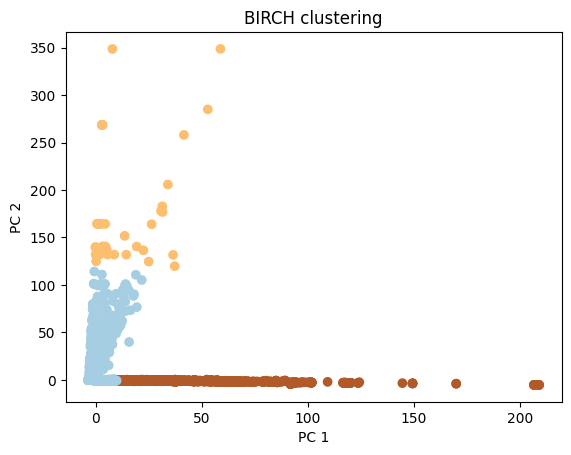

In [ ]:
# plot clusters using a scatter plot
plt.scatter(X_pca_df.iloc[:, 0], X_pca_df.iloc[:, 1], c=y_pred, cmap="Paired") # using the first two features as an example
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("BIRCH clustering")
plt.show()



In [ ]:
# calculate permutation feature importance
result = permutation_importance(birch, X_pca, y, scoring="v_measure_score", random_state=42) # using v-measure as an example metric
importance = result.importances_mean

# sort features by importance in descending order
features = X_pca_df.columns
sorted_features = sorted(zip(features, importance), key=lambda x: x[1], reverse=True)

# print feature importance
print("Feature importance for BIRCH clustering:")
for f, i in sorted_features:
  print(f"{f}: {i:.4f}")

Feature importance for BIRCH clustering:
PC1: 0.1663
PC2: 0.0002
